# Predicting affect of alcohol consumption on grades

## Context

The data was obtained in a survey conducted on students learning math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

## Setup

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import sys

In [3]:
!pip install seaborn

    100% |████████████████████████████████| 184kB 3.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /Users/vishketshriwas/Library/Caches/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn


In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('student-mat.csv')

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'G1', u'G2', u'G3'],
      dtype='object')

## Lets look correlation features between the data

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cbar = True)

In [10]:
plt.xticks(rotation=90)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5]),
 <a list of 16 Text xticklabel objects>)

In [11]:
plt.yticks(rotation=0)
%matplotlib inline

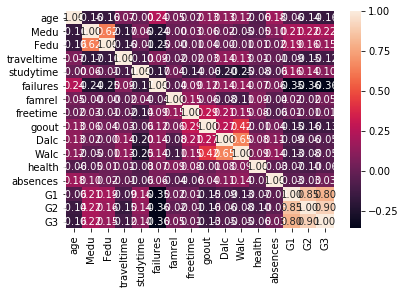

In [16]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cbar = True)

In [15]:
plt.figure(figsize=(35,35))

In [17]:
# The heatmap indicates high correlation between the grades 

In [19]:
df.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'G1', u'G2', u'G3'],
      dtype='object')

In [20]:
# Combining daily and weekly alcohol consumption

In [22]:
df['alc'] = df['Dalc'] + df['Walc']

In [23]:
df['alc'].head()

0    2
1    2
2    5
3    2
4    3
Name: alc, dtype: int64

In [24]:
# Visualize student alcohol consumption

In [26]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [30]:
df.alc.max()

10

In [33]:
list = []
for i in range(11):
    list.append(len(df[df.alc == i]))

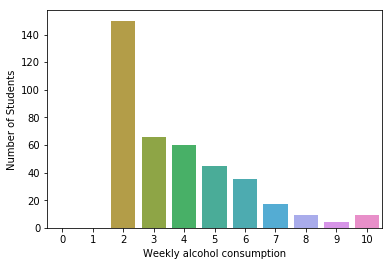

In [34]:
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

In [35]:
# Bar plot indicates no student consumes alcohol less than twice each week

In [36]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,2


In [37]:
df.G1.max()

19

In [38]:
df.G2.max()

19

In [39]:
df.G3.max()

20

In [40]:
df.G3.sum()

4114

In [41]:
# Lets look at grade distribution according to weekly alcohol consumption

In [52]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['green', 'blue', 'cyan', 'grey', 'orange','purple', 'red', 'darksalmon' ]
explode = [0,0, 0,0,0,0,0,0,0]
sizes = []
for i in range(2,11):
    sizes.append(sum(df[df.alc == i].G3))


In [46]:
total_grade = sum(sizes)

In [48]:
average = total_grade/float(len(df))

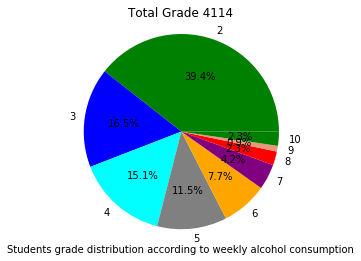

In [53]:
plt.pie(sizes, explode=explode, colors = colors, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Total Grade {}'.format(str(total_grade)))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')

In [54]:
# It looks like student who consume alcohol twice each week seem to have better grades, however this is not entirely accurate
# since the number of students dirnking alcohol twice per week is greater than others


In [55]:
# Lets plot a swarm map to see how grades are affected by weekly alcohol consumption

In [56]:
df.G3.mean()

10.415189873417722

In [57]:
avg = sum(df.G3)/float(len(df))

In [58]:
df['avg_line'] = avg

In [59]:
df['average'] = ['above average' if i > avg else 'under average' for i in df.G3]

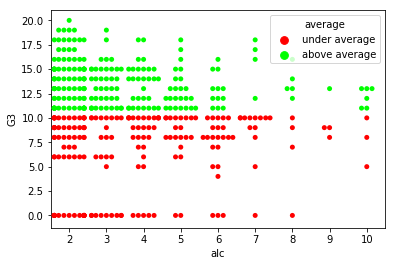

In [60]:
sns.swarmplot(x='alc', y = 'G3', hue = 'average', data=df, palette={'above average':'lime', 'under average':'red'})

In [61]:
# As  it can be seen from the swarmplot, students who consume alcohol twice get highest grades

In [63]:
list = []
for i in range(2,11):
    list.append(sum(df[df.alc == i].G3/float(len(df[df.alc == i]))))

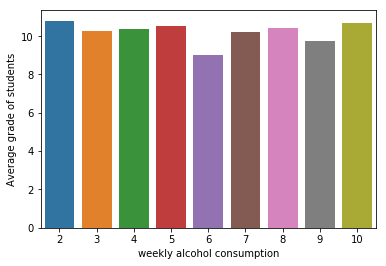

In [65]:
ax = sns.barplot(x = [2,3,4,5,6,7,8,9,10], y = list)
plt.xlabel('weekly alcohol consumption')
plt.ylabel('Average grade of students')